In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
df = pd.read_csv("../data/raw/Rice_Cammeo_Osmancik.csv")

df['Class_encoded'] = df['Class'].map({'Cammeo': 0, 'Osmancik': 1})
X = df.drop(columns=['Class', 'Class_encoded'])  # features
y = df['Class_encoded']  # target

# Train/test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
pred_data = []

# MODELS 

i modelli senza PCA 


### RANDOM FOREST 


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9251968503937008
Precision: 0.927710843373494
Recall: 0.9344660194174758
F1 Score: 0.9310761789600968


In [49]:
results_df.loc[len(results_df)] = ['RF', accuracy, precision, recall, f1]
pred_data.append(['RF', y_pred_prob, y_test])

### SVC


In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svc = SVC(kernel='linear', probability=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svc.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svc.predict(X_test_scaled)
y_pred_prob = svc.predict_proba(X_test_scaled)[:, 1] 

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9291338582677166
Precision: 0.9387254901960784
Recall: 0.9296116504854369
F1 Score: 0.9341463414634147


In [51]:
results_df.loc[len(results_df)] = ['SVC', accuracy, precision, recall, f1]
pred_data.append(['SVC', y_pred_prob, y_test])

### XGBoost


In [52]:
import xgboost as xgb

# Define the pipeline with the preprocessor and an XGBoost classifier
XGB = xgb.XGBClassifier( eval_metric='logloss')

# Train the XGBoost model
XGB.fit(X_train, y_train)

# Predict on the testing set
y_pred = XGB.predict(X_test)
y_pred_prob = XGB.predict_proba(X_test)[:, 1] 

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9173228346456693
Precision: 0.9204819277108434
Recall: 0.9271844660194175
F1 Score: 0.9238210399032648


In [53]:
results_df.loc[len(results_df)] = ['XGB', accuracy, precision, recall, f1]
pred_data.append(['XGB', y_pred_prob, y_test])

### PCA

prima faccio la pca e prendo le componenti importanti


In [54]:
# Standardizzazione 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA sul dataset
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

#Seleziona il numero di componenti che spiegano il 95% varianza 
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(explained_variance >= 0.95) + 1
print(f"Componenti selezionate: {n_components_95}")

# tengo solo le componenti importanti
pca_final = PCA(n_components=n_components_95)
X_pca = pca_final.fit_transform(X_scaled)

# Train/test split 
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


Componenti selezionate: 3


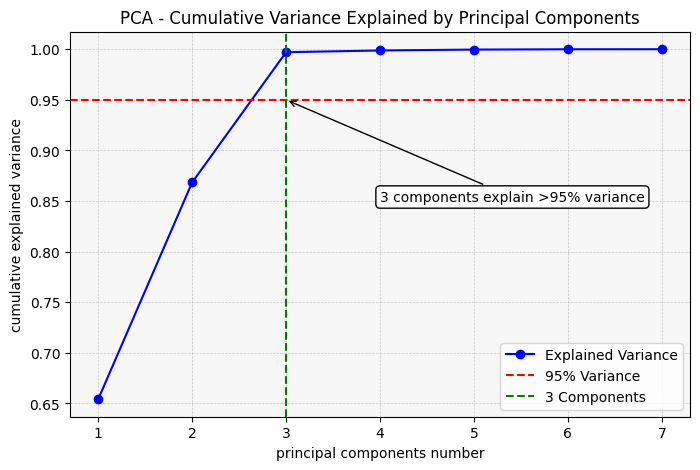

In [55]:
plt.figure(figsize=(8, 5))

plt.plot(explained_variance, marker='o', color='b', label='Explained Variance')

plt.axhline(0.95, color='r', linestyle='--', label='95% Variance')
plt.axvline(n_components_95 - 1, color='g', linestyle='--', label=f'{n_components_95} Components')
plt.xlabel('principal components number')
plt.xticks(ticks=np.arange(len(explained_variance)), labels=np.arange(1, len(explained_variance)+1))    #adjust pc ticks
plt.ylabel('cumulative explained variance')
plt.title('PCA - Cumulative Variance Explained by Principal Components')
plt.legend()

plt.annotate(f'{n_components_95} components explain >95% variance',
             xy=(n_components_95 - 1, 0.95),
             xytext=(n_components_95, 0.85),
             arrowprops=dict(color='black', arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#f7f7f7')

plt.show()

### Random Forest con PCA

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9186351706036745
Precision: 0.9206730769230769
Recall: 0.9296116504854369
F1 Score: 0.9251207729468599


In [34]:
results_df.loc[len(results_df)] = ['RF_pca', accuracy, precision, recall, f1]

### SVG con PCA

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svc = SVC(kernel='linear', random_state=42)

# Train the SVM model
svc.fit(X_train, y_train)

# Predict on the testing set
y_pred = svc.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9291338582677166
Precision: 0.9365853658536586
Recall: 0.9320388349514563
F1 Score: 0.9343065693430657


In [36]:
results_df.loc[len(results_df)] = ['SVC_pca', accuracy, precision, recall, f1]

### XGBoosting con PCA

In [37]:
import xgboost as xgb

# Define the pipeline with the preprocessor and an XGBoost classifier
XGB = xgb.XGBClassifier( eval_metric='logloss')

# Train the XGBoost model
XGB.fit(X_train, y_train)

# Predict on the testing set
y_pred = XGB.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9173228346456693
Precision: 0.9266503667481663
Recall: 0.9199029126213593
F1 Score: 0.9232643118148599


In [38]:
results_df.loc[len(results_df)] = ['XGB_pca', accuracy, precision, recall, f1]

### Naive Bayes con PCA 

In [57]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()  # Laplace smoothing
nb.fit(X_train, y_train)

# Predict on the testing set
y_pred = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1] 

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.926509186351706
Precision: 0.9178403755868545
Recall: 0.9490291262135923
F1 Score: 0.9331742243436754


In [58]:
results_df.loc[len(results_df)] = ['NB', accuracy, precision, recall, f1]
pred_data.append(['NB', y_pred_prob, y_test])

In [41]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,RF,0.925197,0.927711,0.934466,0.931076
1,SVC,0.929134,0.938725,0.929612,0.934146
2,XGB,0.917323,0.920482,0.927184,0.923821
3,RF_pca,0.918635,0.920673,0.929612,0.925121
4,SVC_pca,0.929134,0.936585,0.932039,0.934307
5,XGB_pca,0.917323,0.926650,0.919903,0.923264
6,NB,0.926509,0.917840,0.949029,0.933174


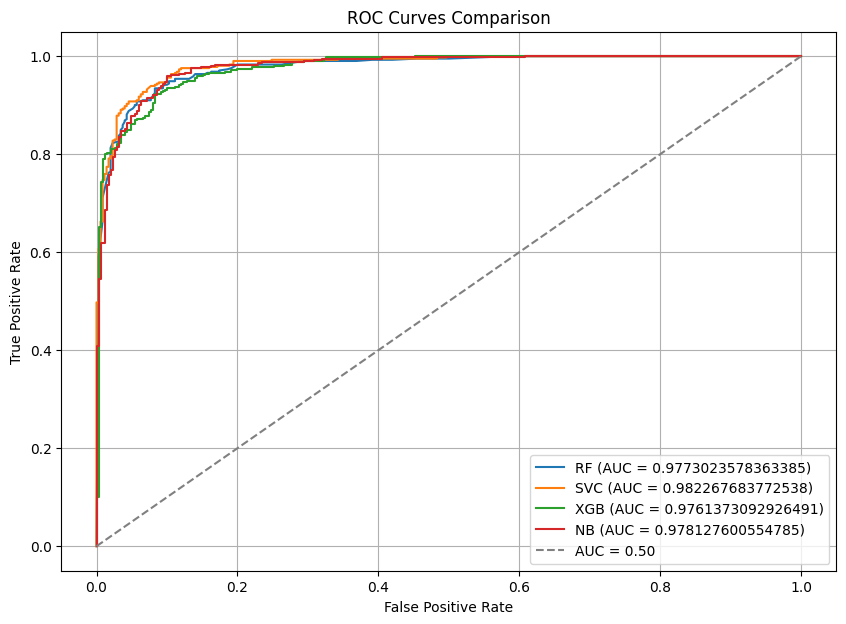

In [59]:
plt.figure(figsize=(10, 7))

for model in pred_data:
    y_true = model[2]
    y_pred_prob = model[1]

    fpr, tpr, _= roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model[0]} (AUC = {auc})')

# Linea di riferimento per un modello casuale
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='AUC = 0.50')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()